### Titanic Machine Learning project by Ismael Martínez

Importing libraries and loading files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('seaborn')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

#### 1. Examining the data and Exercises

In [2]:
full_data = pd.read_csv ('../data/train.csv')

In [3]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Examining the Nans:

In [6]:
full_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

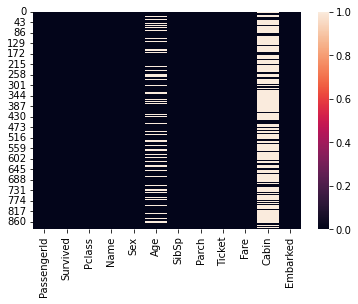

In [7]:
sns.heatmap(full_data.isna())

#### 1.1 Surviving/non-surviving passengers

Information about surviving/ non-surviving:

In [8]:
full_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
surv = full_data['Survived'].value_counts()[1]
nonsurv = full_data['Survived'].value_counts()[0]

Subset of the passengers that survived:

In [10]:
by_sur_df = full_data.groupby('Survived')

In [11]:
by_sur_df.get_group(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Subset of passengers that drowned:

In [12]:
by_sur_df.get_group(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Bar plot with panda:

<AxesSubplot:>

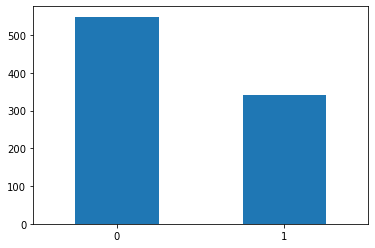

In [13]:
full_data['Survived'].value_counts().plot.bar(rot=0)


Plotting with Seaborn:

<AxesSubplot:xlabel='Survived', ylabel='count'>

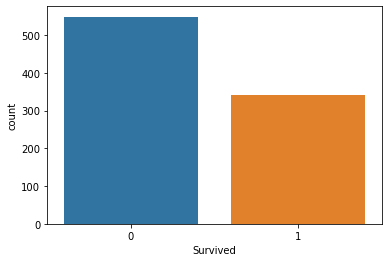

In [14]:
sns.countplot(data=full_data, x='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

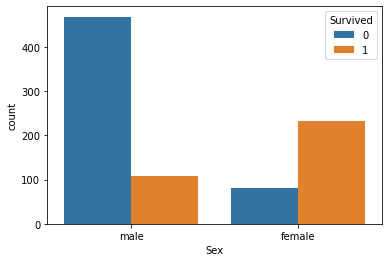

In [15]:
sns.countplot(data=full_data, x='Sex', hue='Survived')

#### 1.2 Proportion of surviving passengers with regards to the total number of 1st class passengers:

First Class Passenger:

<AxesSubplot:xlabel='Pclass', ylabel='count'>

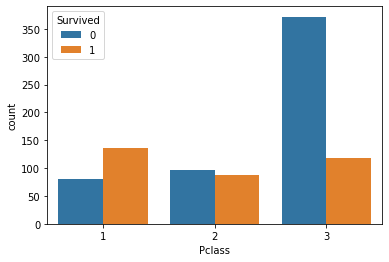

In [16]:
sns.countplot(data=full_data, x='Pclass', hue='Survived')

How many on First class?

In [17]:
firstcl = full_data['Pclass'].loc[full_data['Pclass']==1].count()
firstcl

216

How many on First class survived?

In [18]:
full_data['Survived'].loc[full_data['Pclass']==1].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [19]:
firstcl_sur = full_data['Pclass'].loc[full_data['Pclass']==1].loc[full_data['Survived']==1].count()
firstcl_sur

136

In [20]:
full_data['Survived'].loc[full_data['Pclass']==1]

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

Proportion of surviving passengers in the 1st class:

In [21]:
firstcl_sur / firstcl

0.6296296296296297

#### 1.3 Bar Plot with separate bars for male/ female passengers and 1st/2nd/3d class passengers

<AxesSubplot:xlabel='Sex', ylabel='count'>

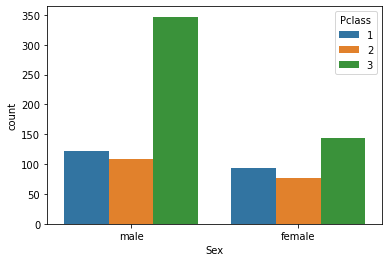

In [22]:
sns.countplot(data=full_data, x='Sex', hue='Pclass' )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

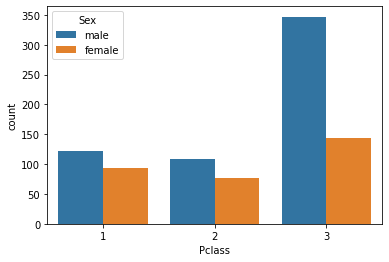

In [23]:
sns.countplot(data=full_data, x='Pclass', hue='Sex' )

#### 1.4 Histogram showing age distributions of passengers among survivals and non-survivals

In [24]:
sur_df = full_data.loc[full_data['Survived']==1]
non_sur_df = full_data.loc[full_data['Survived']==0]

<AxesSubplot:xlabel='Age', ylabel='Count'>

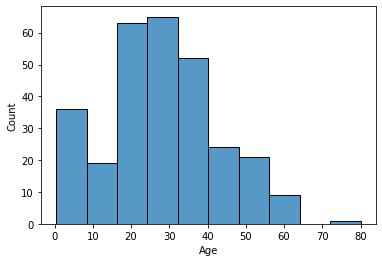

In [25]:
sns.histplot( data=sur_df, x='Age', bins=10 )

<AxesSubplot:xlabel='Age', ylabel='Count'>

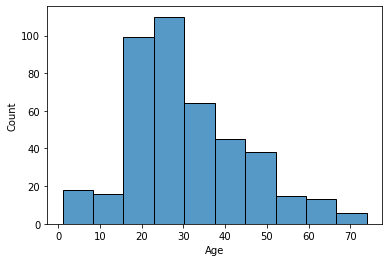

In [26]:
sns.histplot( data=non_sur_df, x='Age', bins=10 )

#### 1.5 Average Age of the survived and the drowned

In [27]:
sur_df['Age'].mean()

28.343689655172415

In [28]:
non_sur_df['Age'].mean()

30.62617924528302

#### 1.6 Replace missing age values by the mean:

In [29]:
full_data['Age'].isna().sum()

177

In [30]:
len (full_data)

891

In [31]:
df_age = full_data['Age'].fillna(full_data['Age'].mean(), inplace=False)

In [32]:
df_age.isna().sum()

0

In [33]:
full_data['Age'].isna().sum()

177

#### 1.7 Table counting the number of surviving/dead passengers

In [34]:
class_df= full_data.groupby('Pclass')

In [35]:
class_df

In [36]:
class_df.groups

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [37]:
class_df['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

### 2. Machine Learning with one feature

Prepare Data for ML:
- training: learning parameter values
- testing: test parameter values found in the training

In [38]:
X = full_data[['Pclass']]
#X = full_data.drop('Survived', axis=1)

y = full_data['Survived']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y) #these can be used for farther models

#### 2.1 Logistic Regression Model

In [40]:
# definition of sigmoid function. we are not going to use it explicitly
def sigmoid(m, b, x):
    return 1/(1+np.exp(-(m*x+b)))    

In [41]:
scaler = StandardScaler()

In [42]:
x_train_sc = scaler.fit_transform(x_train);
x_test_tr = scaler.transform(x_test);

In [43]:
model = LogisticRegression()

In [44]:
model.fit(x_train_sc, y_train)

LogisticRegression()

In [45]:
model.score(x_test_tr, y_test)

0.6367713004484304

What are these? These are the parameters of the model.<br>
Applied linearly on the features and used in the sigmoid function to obtain probabilities.<br>
w0: Intercept is the bias, w1: Weight or coefficient array, same dimension as n of features

In [46]:
model.intercept_, model.coef_

(array([-0.57844223]), array([[-0.7358397]]))

In [47]:
m = model.intercept_[0]
b0 = model.coef_[0,0]

Let's visualize the model function used in this case: Incomplete

In [48]:
x = np.linspace(-10, 10, 201)

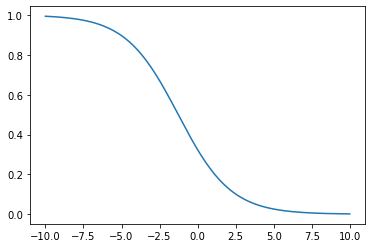

In [49]:
plt.plot(x, sigmoid(m, b0, x))

This model will assign the following probabilities:
Class 1: sigmoid (m, b, 1)
Class 2: sigmoid (m, b, 2)

In [50]:
val_list=list()
x_list=list()
for i in range (1,4) :
    x_list.append( i )
    val_list.append( sigmoid(m,b0,i) )

In [51]:
pera = pd.DataFrame({'x':x_list,'y':val_list})

In [52]:
np.array(val_list)

array([0.21177121, 0.13093418, 0.07790441])

<AxesSubplot:>

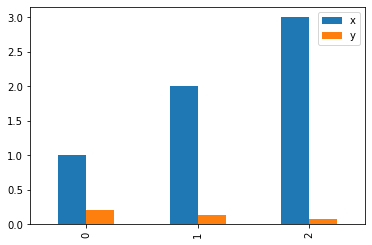

In [53]:
pera.plot.bar()

In [54]:
perat = pera.transpose()

In [55]:
perat

,0,1,2
x,1.000000,2.000000,3.000000
y,0.211771,0.130934,0.077904


<AxesSubplot:xlabel='x', ylabel='count'>

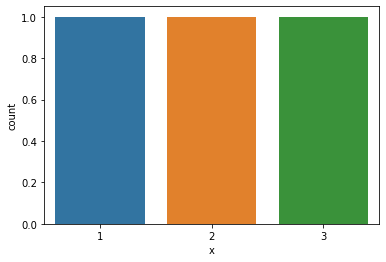

In [56]:
sns.countplot(x='x', data=pera)

Calculate the probabilities for your data points belonging to the positive class (Survived=1)

In [57]:
model.predict_proba(x_test_tr).round(2)[:,1]

array([0.24, 0.24, 0.64, 0.43, 0.24, 0.43, 0.64, 0.64, 0.24, 0.64, 0.64,
       0.43, 0.24, 0.24, 0.24, 0.43, 0.64, 0.64, 0.24, 0.24, 0.64, 0.24,
       0.43, 0.24, 0.24, 0.43, 0.24, 0.24, 0.24, 0.24, 0.43, 0.43, 0.43,
       0.24, 0.24, 0.43, 0.43, 0.24, 0.43, 0.24, 0.24, 0.43, 0.24, 0.24,
       0.24, 0.24, 0.64, 0.24, 0.24, 0.64, 0.43, 0.24, 0.24, 0.64, 0.43,
       0.24, 0.24, 0.24, 0.64, 0.24, 0.24, 0.64, 0.24, 0.43, 0.24, 0.43,
       0.64, 0.24, 0.24, 0.24, 0.64, 0.64, 0.24, 0.24, 0.43, 0.43, 0.43,
       0.24, 0.64, 0.64, 0.24, 0.64, 0.64, 0.64, 0.43, 0.24, 0.24, 0.24,
       0.43, 0.43, 0.64, 0.64, 0.64, 0.24, 0.64, 0.43, 0.43, 0.43, 0.64,
       0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.43, 0.24, 0.64, 0.64, 0.24,
       0.43, 0.24, 0.43, 0.24, 0.24, 0.24, 0.64, 0.24, 0.43, 0.64, 0.24,
       0.43, 0.24, 0.43, 0.64, 0.24, 0.43, 0.24, 0.24, 0.24, 0.43, 0.43,
       0.64, 0.64, 0.24, 0.43, 0.24, 0.24, 0.24, 0.64, 0.24, 0.24, 0.43,
       0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.

Which where the thresholds in my calculation?

Suppose you classify all points with a probability > 0.9 as positive.<br>
- How does the result of your prediction change?
- How does it change if you change the threshold to > 0.1?

#### 2.2 Cross Validation

#### 2.3 Decision Tree Classifier with sklearn

Trial with one feature is not so meaningful

In [58]:
model = DecisionTreeClassifier(max_depth=1)

In [59]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [60]:
y_pred = model.predict(X)

In [61]:
model.score(x_train,y_train)

0.6751497005988024

In [62]:
model.score(x_test,y_test)

0.6457399103139013

#### 2.4 Random Forest

Trial with one feature is not so meaningful

In [63]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, max_features=1)

In [64]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_features=1)

In [65]:
model.score(x_train, y_train)

0.6931137724550899

In [66]:
model.score(x_test, y_test)

0.6367713004484304

### 3. Machine Learning with Several features

#### 3.1 New Set of features and new split into train and test data

In [67]:
X = full_data[['Pclass','Age','Sex']]

y = full_data['Survived']

Features Engineering to apply to the selected features:
- Age: Impute median, Binning
- Sex: One-hot encoding
- PClass: it's ok 

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [69]:
x_train

,Pclass,Age,Sex
307,1,17.0,female
477,3,29.0,male
420,3,NaN,male
448,3,5.0,female
237,2,8.0,female
...,...,...,...
219,2,30.0,male
470,3,NaN,male
655,2,24.0,male
103,3,33.0,male


#### 3.2 Deal with NANs

In [70]:
full_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Imputing Embarked NaNs based on full data set:

In [71]:
full_data.Embarked.isna() #alternativ full_data['Embarked'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [72]:
full_data[full_data['Embarked'].isna()==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [73]:
full_data.groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [74]:
most_common_emb = full_data['Embarked'].mode()[0]

In [75]:
most_common_emb

'S'

In [76]:
# here the embarked Nans are filled based on an assumption on the full data set
# assumption: woman and maiden, assume Southhamton
# in contradiction with engineering the features after splitting
full_data['Embarked'].fillna('most_common_emb', inplace=True)

Dealing with Nans on Age on the train data set

In [77]:
x_train['Age'].isna().sum()

132

In [78]:
median_age_tr = x_train['Age'].median()

In [79]:
median_age_tr 

28.0

In [80]:
x_train['Age'].fillna(median_age_tr, inplace=True )

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [81]:
x_train['Age'].isna().sum()

0

#### 3.3 One Hot Minute

In [82]:
x_train

,Pclass,Age,Sex
307,1,17.0,female
477,3,29.0,male
420,3,28.0,male
448,3,5.0,female
237,2,8.0,female
...,...,...,...
219,2,30.0,male
470,3,28.0,male
655,2,24.0,male
103,3,33.0,male


In [83]:
x_train.isna().sum()

Pclass    0
Age       0
Sex       0
dtype: int64

In [84]:
pd.get_dummies(x_train['Sex'])

,female,male
307,1,0
477,0,1
420,0,1
448,1,0
237,1,0
...,...,...
219,0,1
470,0,1
655,0,1
103,0,1


In [85]:
x_train = x_train.merge(pd.get_dummies(x_train['Sex']), left_index=True, right_index=True)

In [86]:
x_train

,Pclass,Age,Sex,female,male
307,1,17.0,female,1,0
477,3,29.0,male,0,1
420,3,28.0,male,0,1
448,3,5.0,female,1,0
237,2,8.0,female,1,0
...,...,...,...,...,...
219,2,30.0,male,0,1
470,3,28.0,male,0,1
655,2,24.0,male,0,1
103,3,33.0,male,0,1


In [87]:
x_train.drop(columns= ['Sex', 'female' ])

,Pclass,Age,male
307,1,17.0,0
477,3,29.0,1
420,3,28.0,1
448,3,5.0,0
237,2,8.0,0
...,...,...,...
219,2,30.0,1
470,3,28.0,1
655,2,24.0,1
103,3,33.0,1


In [88]:
# handle_unknown: an unknown is value for the feature that appears on the test set that didn't appear on the train set
# ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='first') #can't run with'unknown' instead of 'error'

In [89]:
#first method: overwrite one-hot encoded column, warning!
#x_train['Sex'] = ohe.fit_transform(x_train[['Sex']]) 
#x_test['Sex'] = ohe.transform(x_test[['Sex']])

In [90]:
#second method:
#x_train['Sex'] = ohe.fit_transform(x_train[['Sex']]) 
#x_test_oh = ohe.transform(x_test[['Sex']])

In [91]:
#x_train_oh;

Logistic Regression

Decission Tree

Random forest